In [1]:
import zipfile
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('train_users_2.csv.zip', compression='zip')
test_df = pd.read_csv('test_users.csv.zip', compression='zip')
sessions_df = pd.read_csv('sessions.csv.zip', compression='zip')

In [3]:
train_df

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,-unknown-,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,-unknown-,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [4]:
train_df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [5]:
train_df['date_account_created'] = pd.to_datetime(train_df['date_account_created'], format='%Y-%m-%d')
train_df['timestamp_first_active'] = pd.to_datetime(train_df['timestamp_first_active'] , format='%Y%m%d%H%M%S')

In [6]:
train_df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [7]:
users_with_destination = train_df.loc[train_df['country_destination'] != 'NDF']
users_without_destination = train_df.loc[train_df['country_destination'] == 'NDF']

In [8]:
users_with_destination 

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,2010-01-01 21:56:19,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,2010-01-02 01:25:58,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213415,7plqriggxp,2014-06-30,2014-06-30 23:01:36,2014-06-30,-unknown-,55.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,FR
213439,msucfwmlzc,2014-06-30,2014-06-30 23:47:29,2015-03-16,MALE,43.0,basic,0,en,direct,direct,untracked,Web,Windows Desktop,Firefox,US
213441,omlc9iku7t,2014-06-30,2014-06-30 23:51:51,2014-08-13,FEMALE,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,ES
213443,0k26r3mir0,2014-06-30,2014-06-30 23:53:40,2014-07-13,FEMALE,36.0,basic,0,en,sem-brand,google,linked,Web,Mac Desktop,Safari,US


In [9]:
users_with_destination.index = pd.DatetimeIndex(users_with_destination['date_account_created'])
users_without_destination.index = pd.DatetimeIndex(users_without_destination['date_account_created'])

Text(0, 0.5, 'Number of Account Created')

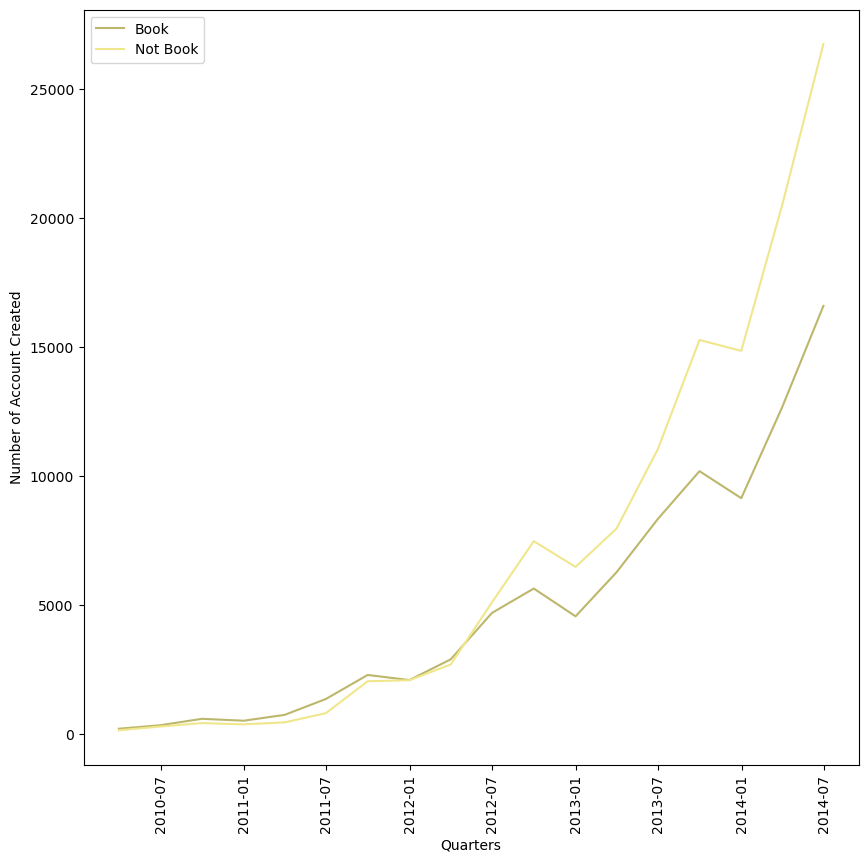

In [10]:
plt.figure(figsize = [10,10],dpi=100)
plt.plot(users_with_destination.resample('Q').size(), color = 'darkkhaki', label='Book')
plt.plot(users_without_destination.resample('Q').size(), color = 'khaki', label='Not Book')
#plt.title('Crimes Count Per Year')
plt.xticks(rotation=90)
plt.legend(loc = 'upper left')
plt.xlabel('Quarters')
plt.ylabel('Number of Account Created')

In [11]:
users_with_destination = users_with_destination.reset_index(drop=True)
users_without_destination = users_without_destination.reset_index(drop=True)

In [13]:
users_with_destination['age'].unique()

array([5.600e+01, 4.200e+01, 4.100e+01,       nan, 4.600e+01, 4.700e+01,
       5.000e+01, 3.600e+01, 3.300e+01, 3.100e+01, 2.900e+01, 3.000e+01,
       4.000e+01, 2.600e+01, 3.200e+01, 3.500e+01, 3.700e+01, 4.400e+01,
       3.400e+01, 1.900e+01, 5.200e+01, 5.700e+01, 4.900e+01, 5.400e+01,
       2.800e+01, 6.900e+01, 4.300e+01, 3.900e+01, 2.500e+01, 6.500e+01,
       3.800e+01, 6.300e+01, 1.800e+01, 5.000e+00, 4.500e+01, 6.000e+01,
       4.800e+01, 5.100e+01, 6.100e+01, 6.400e+01, 7.000e+01, 6.700e+01,
       5.500e+01, 7.300e+01, 2.014e+03, 1.040e+02, 6.600e+01, 1.050e+02,
       6.800e+01, 2.700e+01, 5.300e+01, 5.800e+01, 7.500e+01, 5.900e+01,
       7.900e+01, 6.200e+01, 2.013e+03, 7.200e+01, 4.000e+00, 2.400e+01,
       1.010e+02, 9.800e+01, 7.400e+01, 2.300e+01, 8.700e+01, 9.200e+01,
       8.400e+01, 7.100e+01, 2.100e+01, 1.500e+01, 2.200e+01, 2.000e+00,
       7.800e+01, 8.600e+01, 1.030e+02, 8.100e+01, 9.500e+01, 9.000e+01,
       8.200e+01, 7.700e+01, 1.070e+02, 8.500e+01, 

In [15]:
users_with_destination.loc[users_with_destination['age'] > 1000, 'age'] = 2014 - users_with_destination['age']

In [16]:
users_with_destination['age'].describe()

count    68532.000000
mean        36.918826
std         13.999895
min          0.000000
25%         28.000000
50%         33.000000
75%         42.000000
max        150.000000
Name: age, dtype: float64

In [22]:
with_age_group = users_with_destination.dropna(subset=['age'])
without_age_group = users_without_destination.dropna(subset=['age'])

In [23]:
def ageGroup(age):
    if age < 18:
        return 'age < 18'
    elif age >= 18 and age < 28: 
        return '18 <= age < 28'
    elif age >= 28 and age < 38:
        return '28 <= age < 38'
    elif age >= 38 and age < 48: 
        return '38 <= age < 48'
    elif age >= 48 and age < 58:
        return '48 <= age < 58'
    elif age >= 58 and age < 68:
        return '58 <= age < 68'
    elif age >= 68 and age < 78:
        return '68 <= age < 78'
    elif age >= 78 and age < 88:
        return '78 <= age < 88'
    elif age >= 88 and age < 98:
        return '88 <= age < 98'
    else:
        return 'age >= 98'   
with_age_group = with_age_group.age.apply(ageGroup)
without_age_group = without_age_group.age.apply(ageGroup)

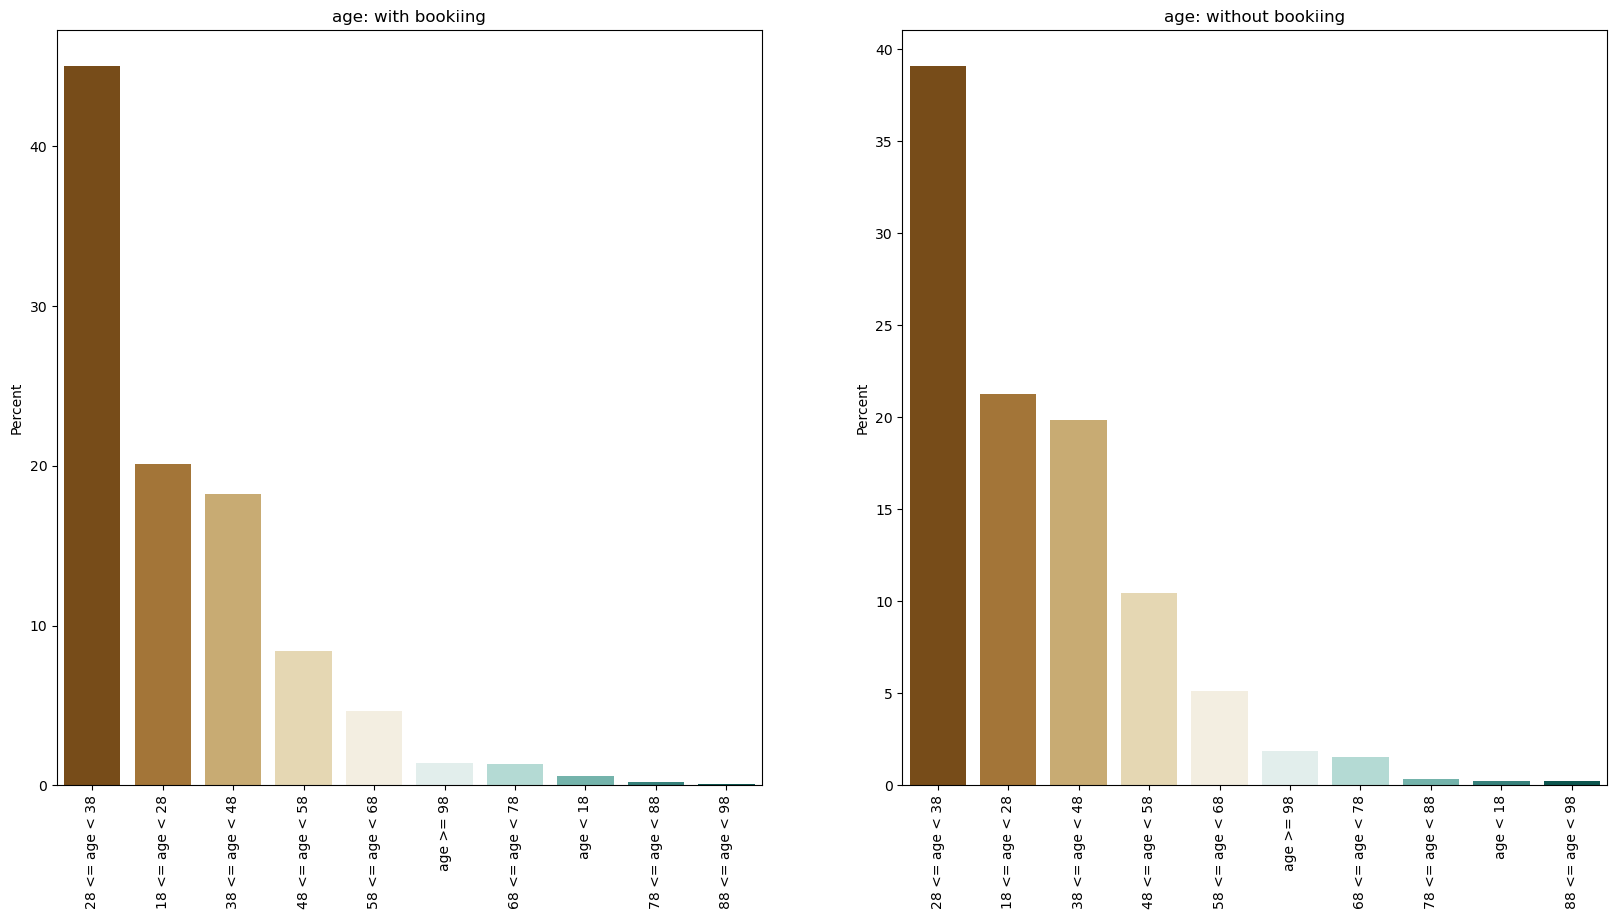

In [59]:
fig, ax =plt.subplots(1,2, figsize=(20,10), dpi=100)
sns.barplot(x = with_age_group.value_counts().index, y = (with_age_group.value_counts().values)*100/len(with_age_group), ax=ax[0], palette='BrBG')
sns.barplot(x = without_age_group.value_counts().index, y = (without_age_group.value_counts().values)*100/len(without_age_group), ax=ax[1], palette='BrBG')
ax[0].set_title("age: with bookiing")
ax[1].set_title("age: without bookiing")
ax[0].set_ylabel('Percent')
ax[1].set_ylabel('Percent')
ax[0].tick_params('x', labelrotation=90)
ax[1].tick_params('x', labelrotation=90)


In [44]:
def featureBarplot(feature, df_with = users_with_destination, df_without = users_without_destination, figsize=(20,10), dpi=100, rotation = 90, palette='BrBG'): 
    with_feature = df_with[feature].value_counts()
    without_feature = df_without[feature].value_counts()
    fig, ax = plt.subplots(1,2,figsize = figsize, dpi=dpi)
    sns.barplot(x=with_feature.index, y=(with_feature.values)*100/len(df_with), ax=ax[0], palette=palette)
    sns.barplot(x=without_feature.index, y=(without_feature.values)*100/len(df_without), ax=ax[1], palette=palette) 
    ax[0].tick_params('x', labelrotation=rotation)
    ax[1].tick_params('x', labelrotation=rotation)
    ax[0].set_title(feature + ': with booking')
    ax[1].set_title(feature + ': without booking')
    ax[0].set_ylabel('Percent')
    ax[1].set_ylabel('Percent')

In [64]:
users_with_destination['gender'].value_counts()

FEMALE       31993
-unknown-    29018
MALE         27721
OTHER          176
Name: gender, dtype: int64

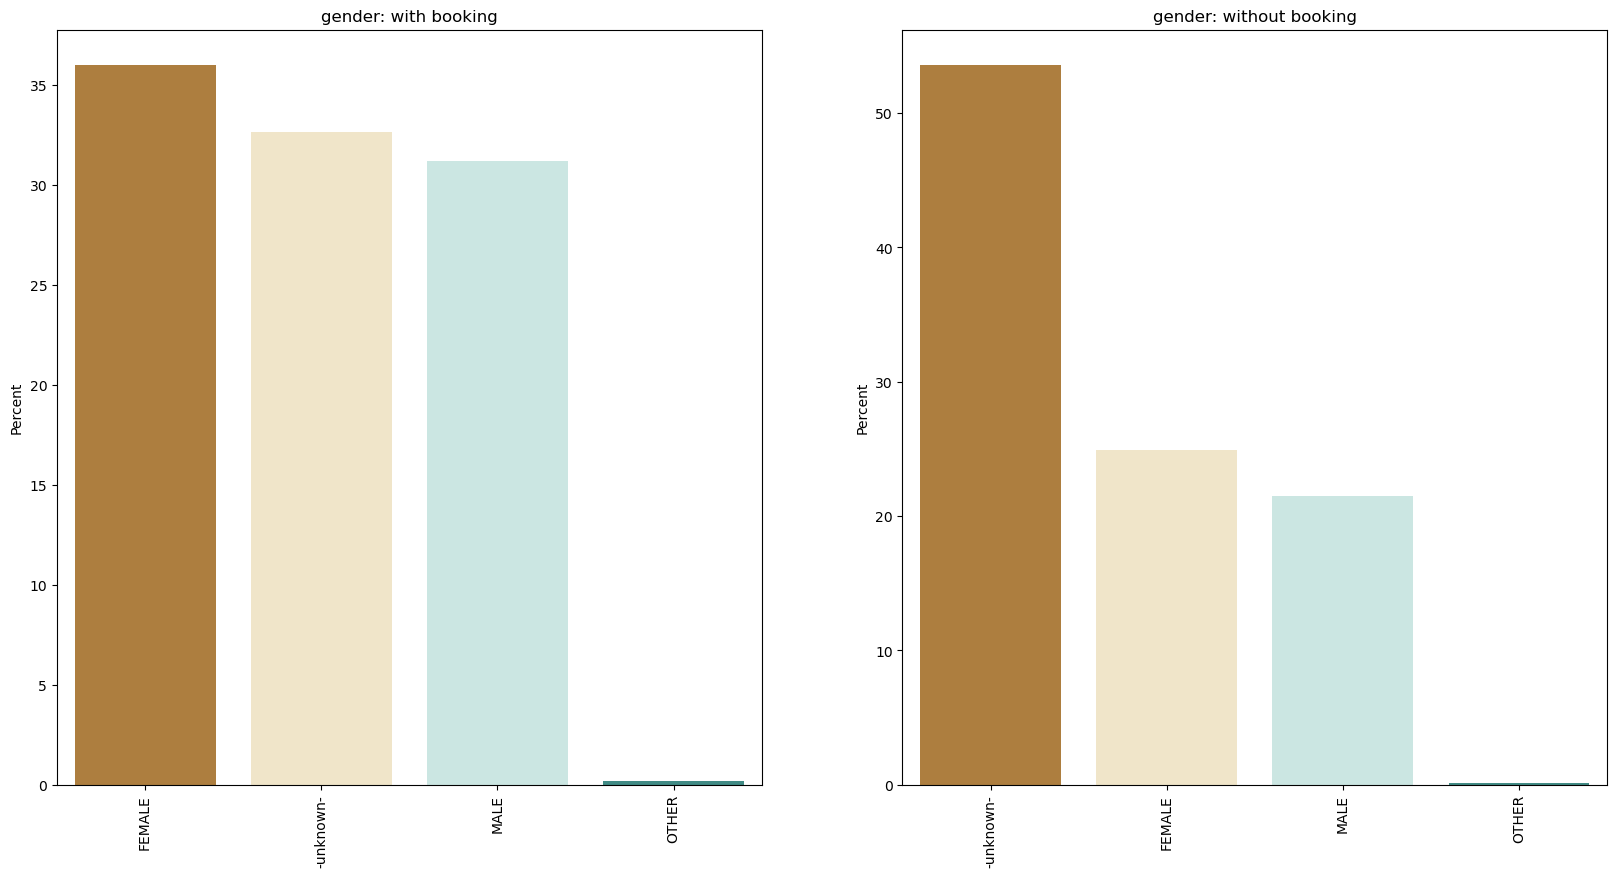

In [46]:
featureBarplot('gender')

In [65]:
users_with_destination['signup_method'].value_counts()

basic       65051
facebook    23756
google        101
Name: signup_method, dtype: int64

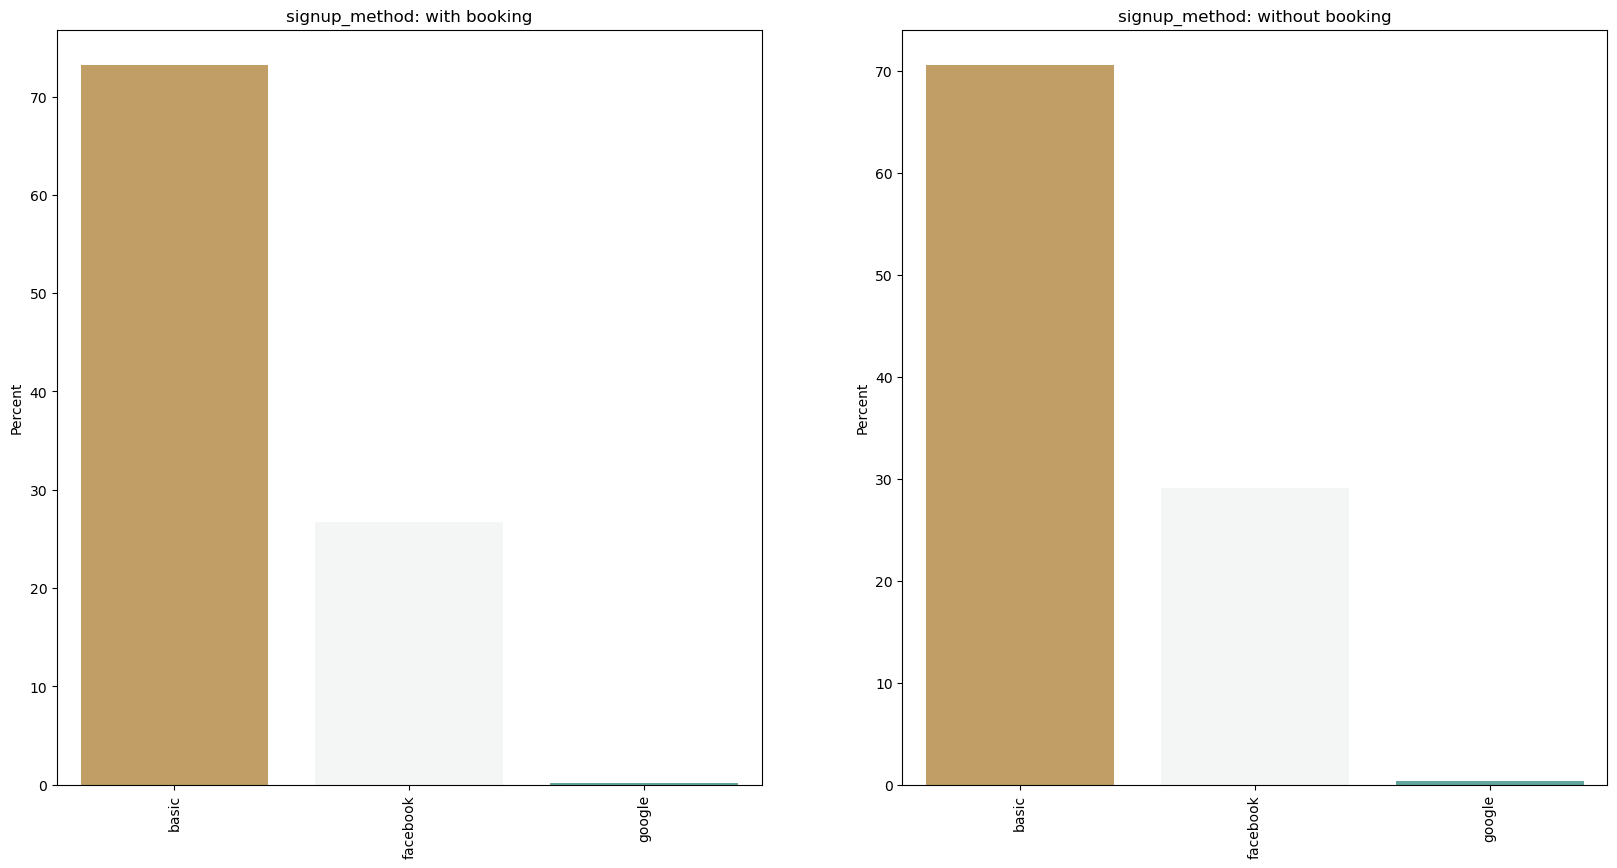

In [50]:
featureBarplot('signup_method')

In [66]:
users_with_destination['language'].value_counts()

en    86664
zh      521
fr      399
es      275
de      270
ko      241
ru      110
it      104
ja       84
pt       62
sv       44
nl       35
tr       20
da       19
no       13
pl       13
cs        9
fi        7
el        6
hu        4
th        4
is        2
ca        2
Name: language, dtype: int64

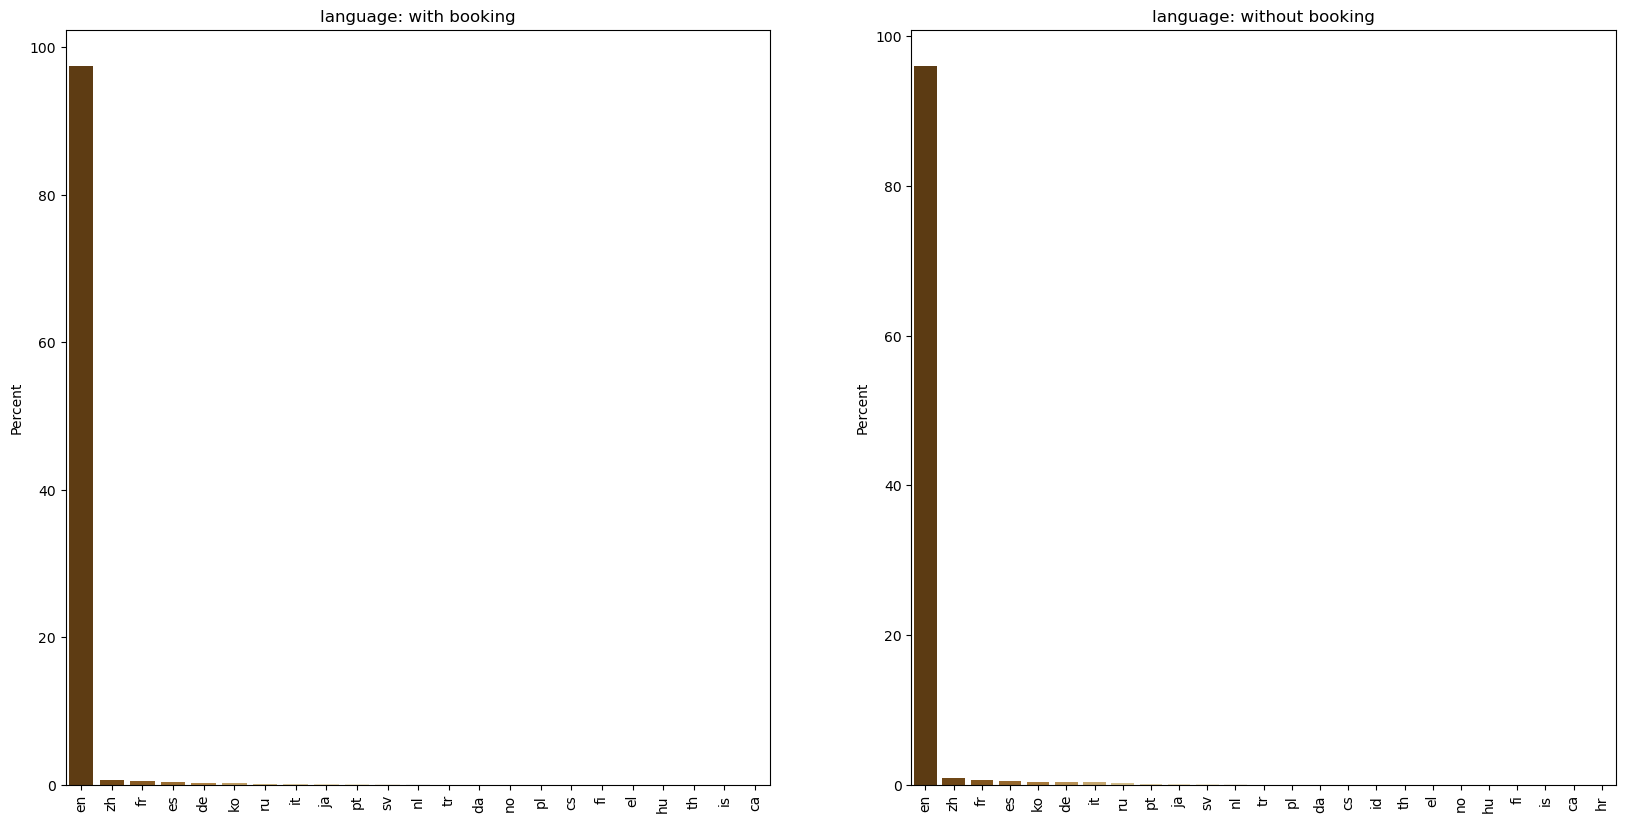

In [52]:
featureBarplot('language')

In [67]:
users_with_destination['affiliate_channel'].value_counts()

direct           59398
sem-brand        11094
sem-non-brand     7150
seo               3955
other             3600
api               2785
content            558
remarketing        368
Name: affiliate_channel, dtype: int64

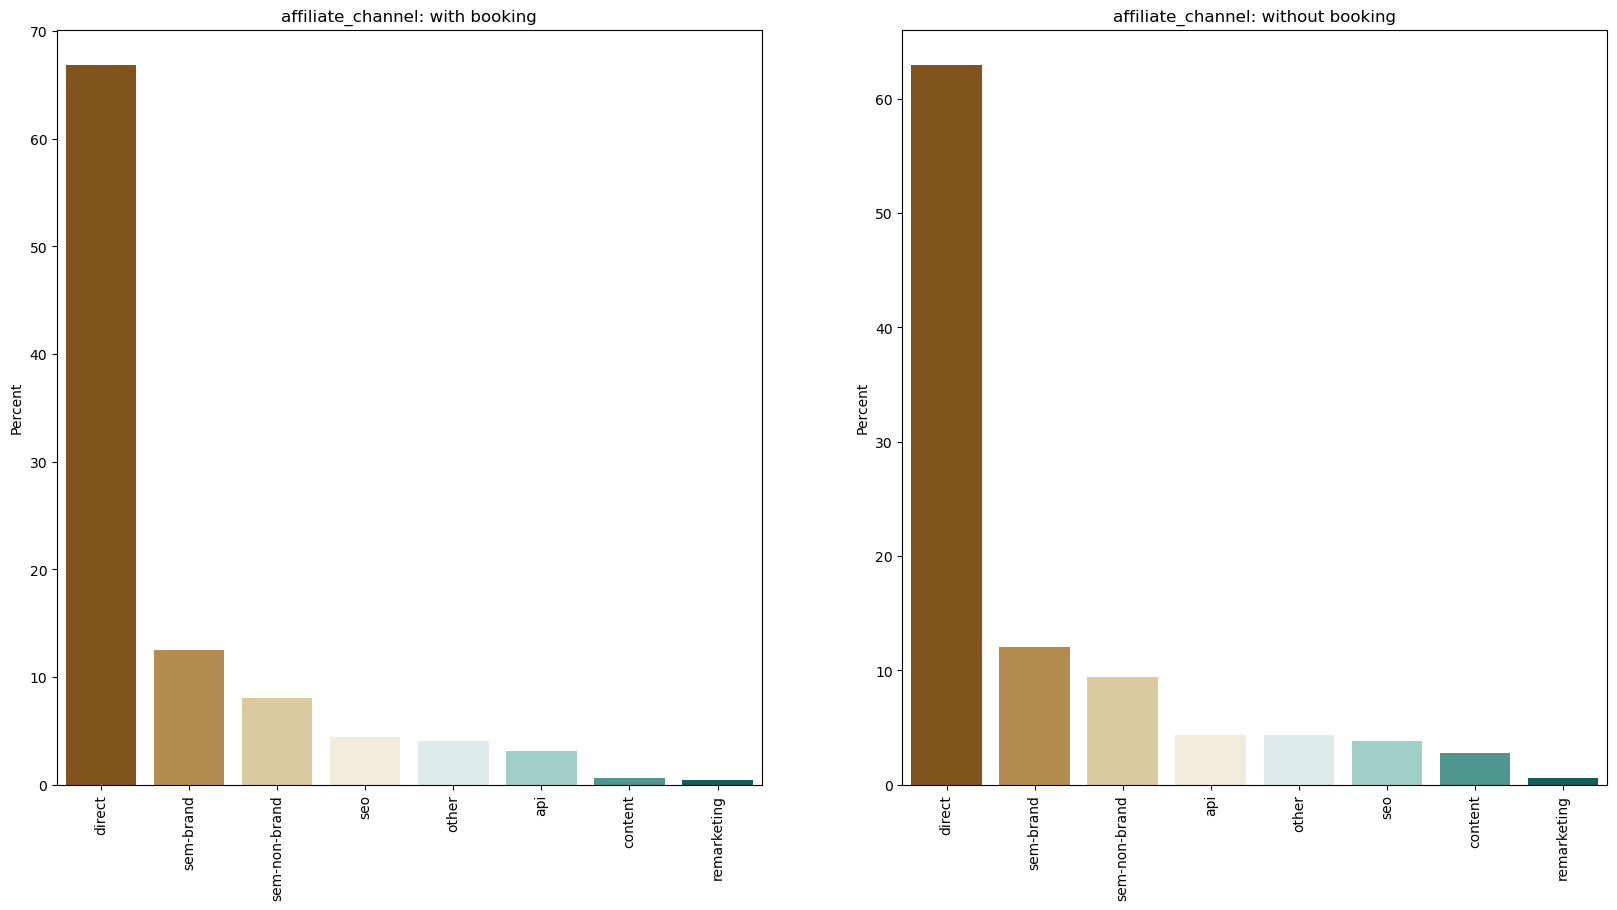

In [53]:
featureBarplot('affiliate_channel')

In [68]:
users_with_destination['affiliate_provider'].value_counts()

direct                 59234
google                 20779
other                   4663
craigslist              1616
bing                     833
facebook                 792
vast                     271
padmapper                252
yahoo                    174
facebook-open-graph      141
meetup                    46
gsp                       37
email-marketing           37
naver                     18
baidu                     10
yandex                     4
daum                       1
Name: affiliate_provider, dtype: int64

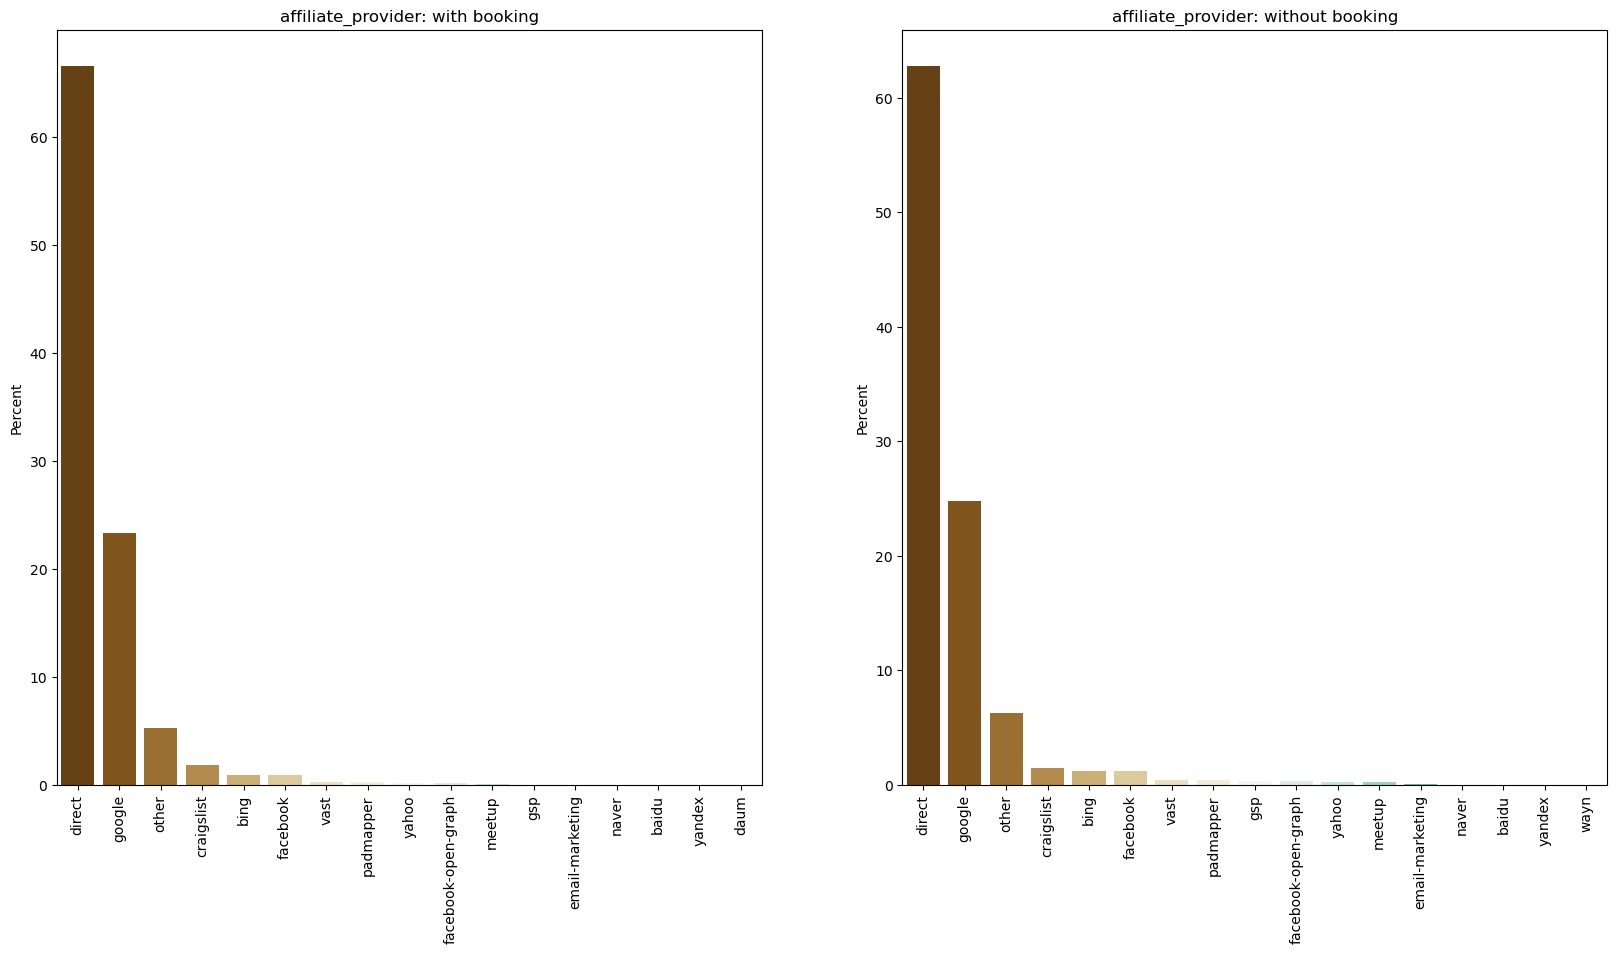

In [54]:
featureBarplot('affiliate_provider')

In [69]:
users_with_destination['first_affiliate_tracked'].value_counts()

untracked        47739
linked           20102
omg              16425
tracked-other     2290
product            542
marketing           63
local ops            9
Name: first_affiliate_tracked, dtype: int64

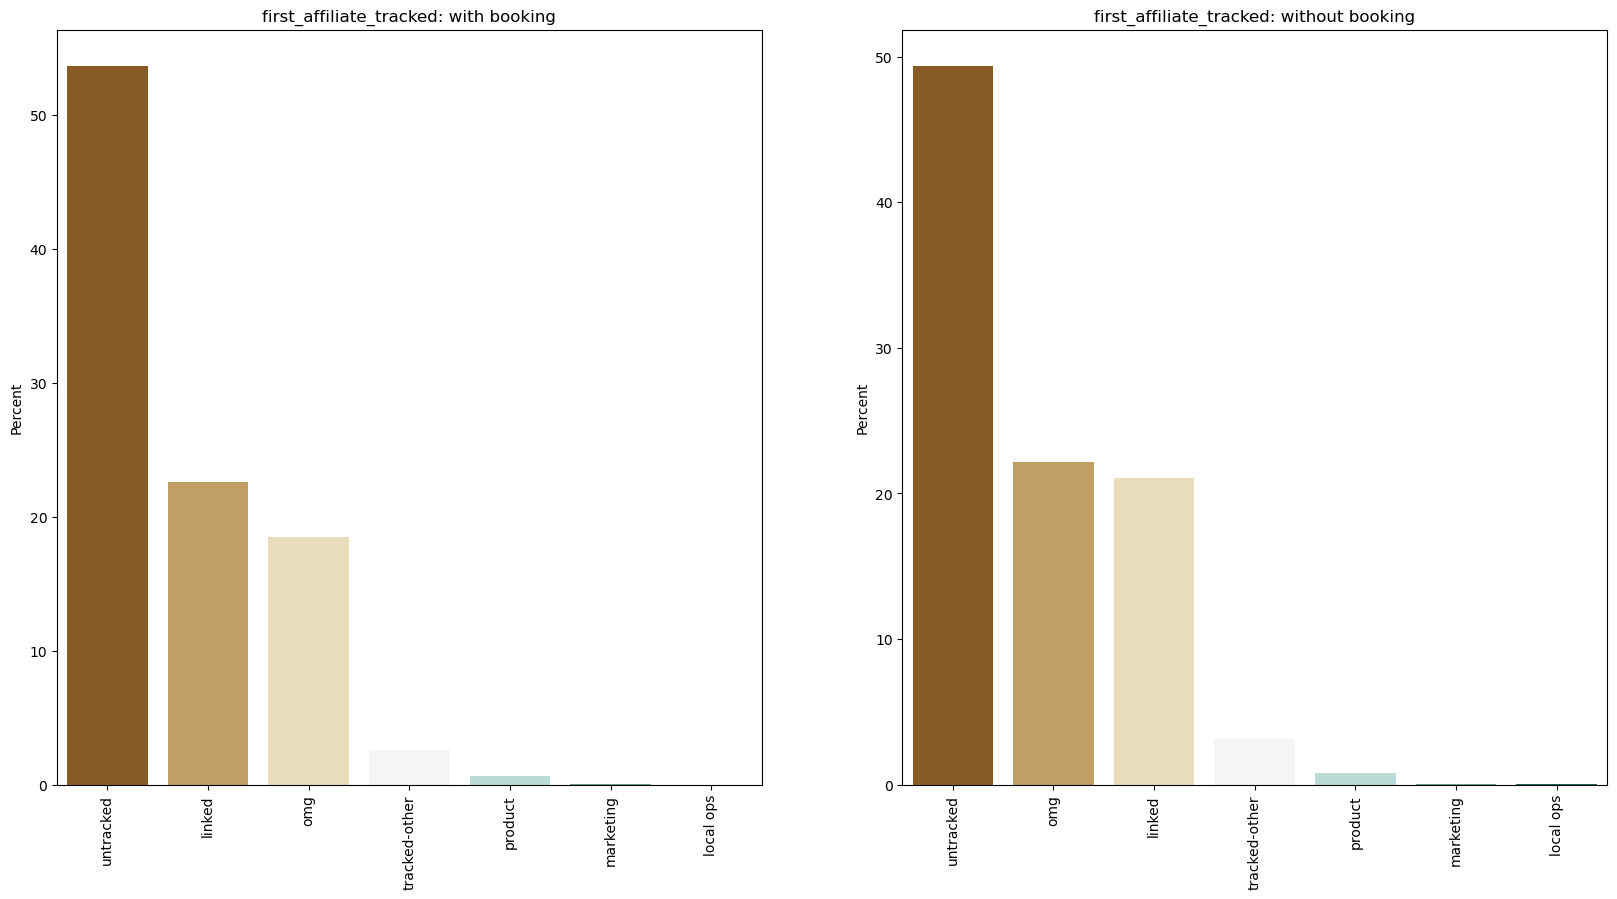

In [55]:
featureBarplot('first_affiliate_tracked')

In [70]:
users_with_destination['signup_app'].value_counts()

Web        80021
iOS         5511
Moweb       2143
Android     1233
Name: signup_app, dtype: int64

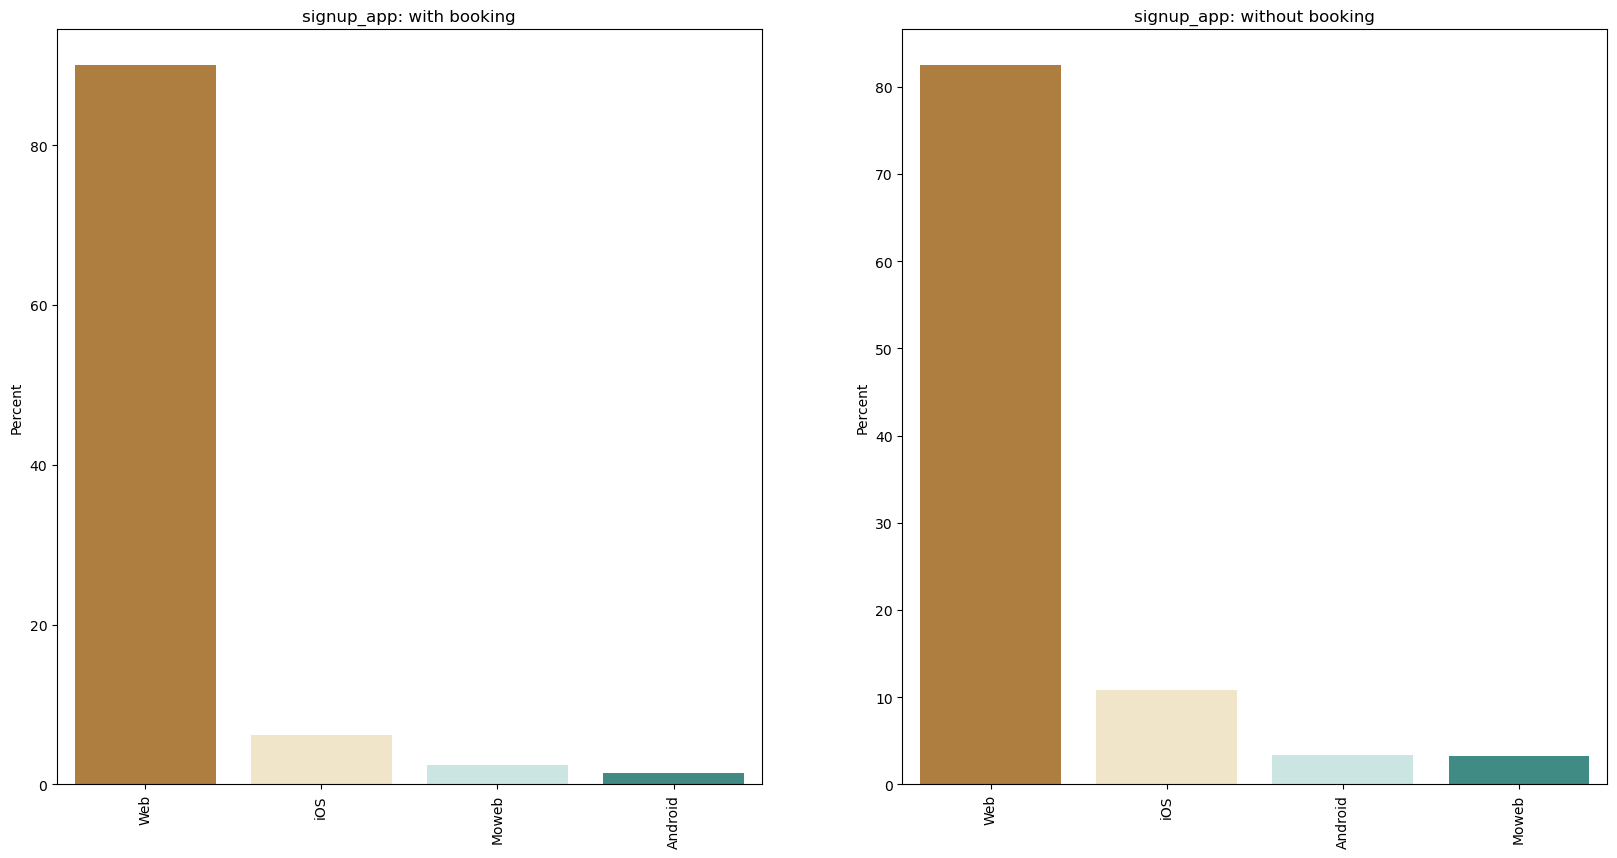

In [56]:
featureBarplot('signup_app')

In [63]:
users_with_destination['first_device_type'].value_counts()

Mac Desktop           42250
Windows Desktop       30152
iPhone                 6417
iPad                   5464
Other/Unknown          2875
Android Phone           715
Desktop (Other)         550
Android Tablet          460
SmartPhone (Other)       25
Name: first_device_type, dtype: int64

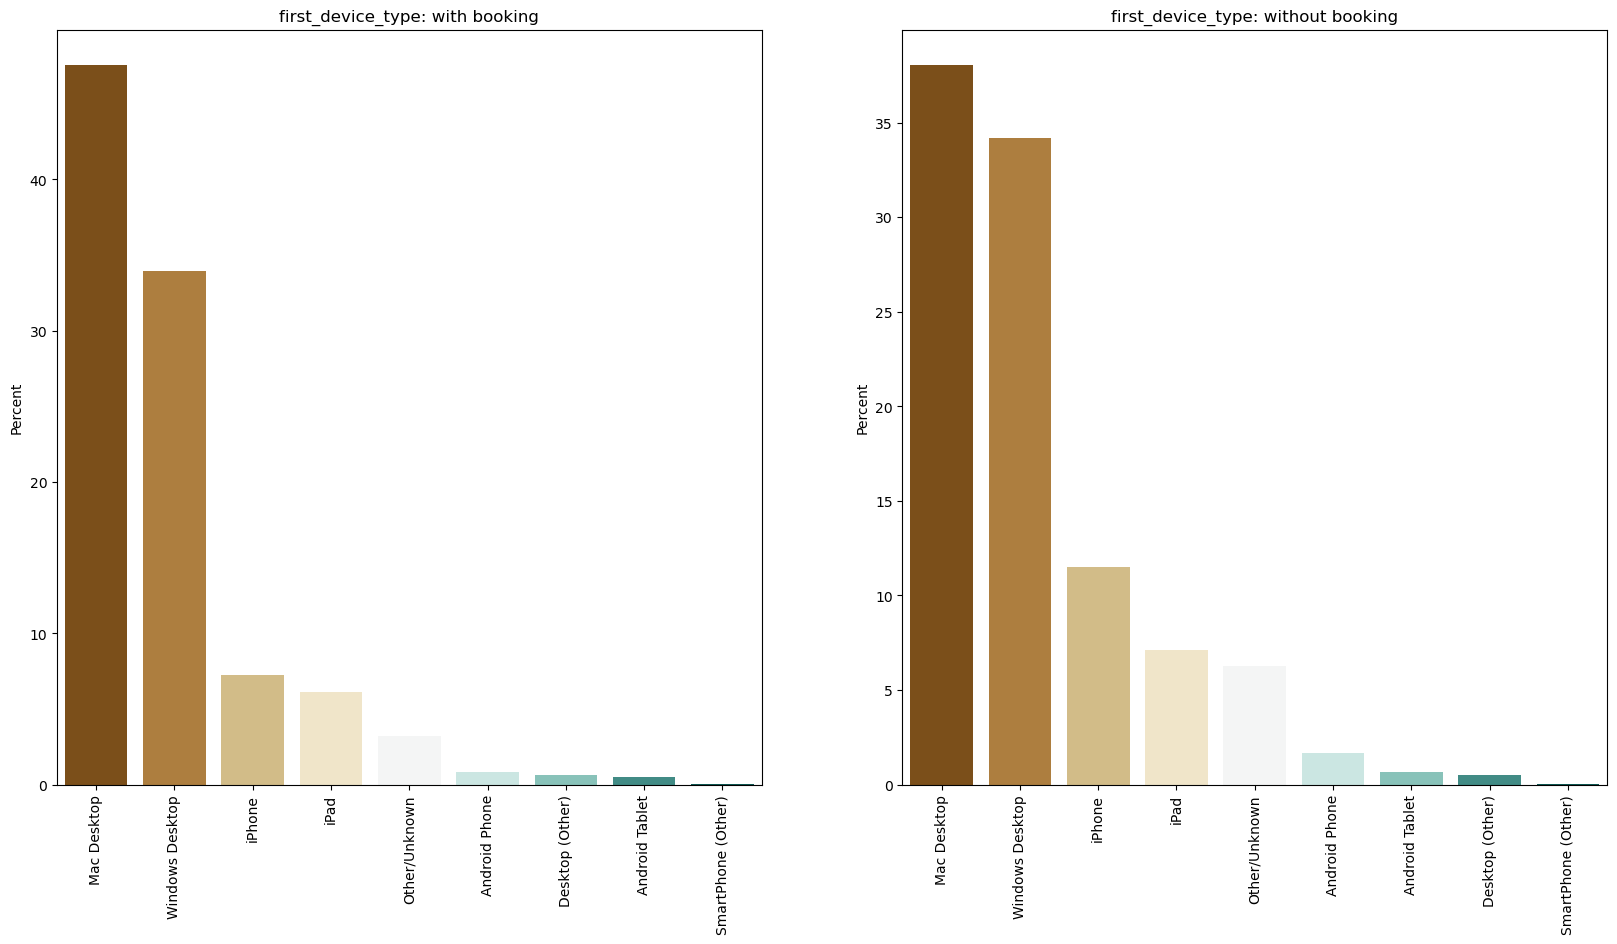

In [57]:
featureBarplot('first_device_type')

In [62]:
users_with_destination['first_browser'].value_counts()

Chrome                  29877
Safari                  19721
Firefox                 15730
IE                       7723
-unknown-                7618
Mobile Safari            7181
Chrome Mobile             408
Android Browser           280
Opera                      64
AOL Explorer               63
Silk                       43
Chromium                   43
BlackBerry Browser         22
Maxthon                    16
Apple Mail                 15
Mobile Firefox             13
RockMelt                   12
Sogou Explorer              9
Iron                        9
IceWeasel                   8
IE Mobile                   7
Camino                      7
SiteKiosk                   7
Pale Moon                   4
TenFourFox                  4
SeaMonkey                   4
CoolNovo                    3
wOSBrowser                  3
Opera Mini                  2
TheWorld Browser            2
Avant Browser               1
SlimBrowser                 1
Palm Pre web browser        1
NetNewsWir

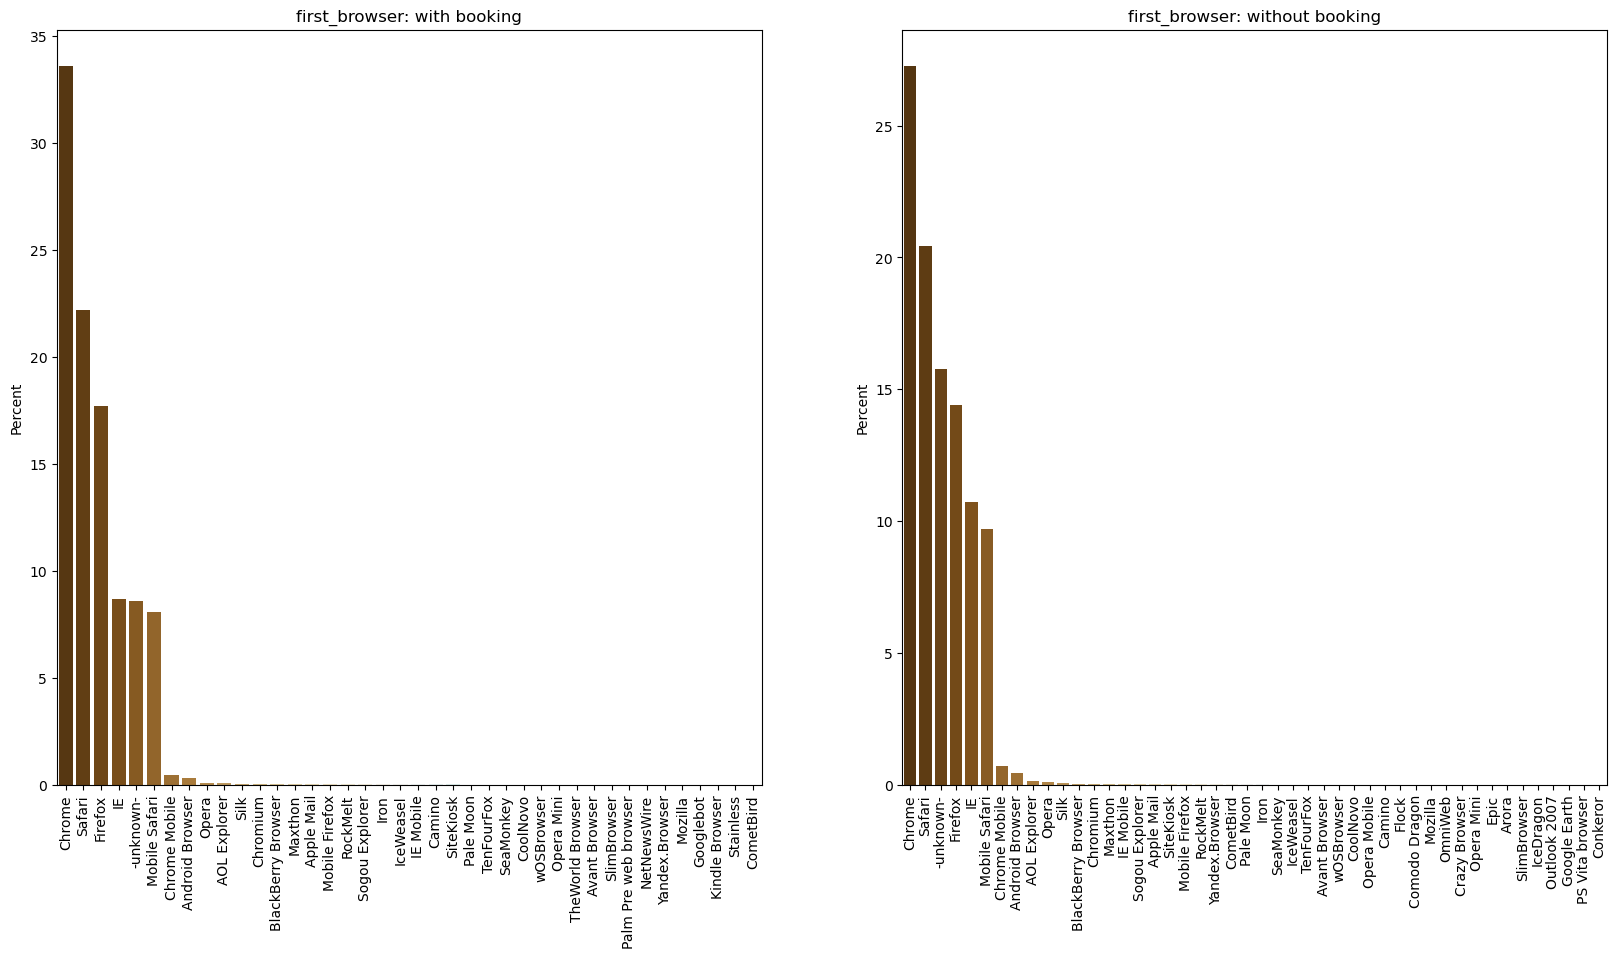

In [58]:
featureBarplot('first_browser')